In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as tck
import numpy as np
import astropy.io.ascii
import pandas as pd

In [2]:
# Load data
sdata = astropy.io.ascii.read('mamajek_star_data.txt', data_start = 2)
stars10pc = astropy.io.ascii.read('near10pc_K.txt',data_start = 1)

# convert to pandas dataframe for ease of use
sdata = sdata.to_pandas()
stars10pc = stars10pc.to_pandas()

# remove duplicate column in sdata
sdata = sdata.drop('col17', axis = 1)

# rename columns to original names

sdata = sdata.rename(columns={'col1':'SpT', 'col2':'Teff', 'col3':'logT', 'col4':'BCv', 'col5':'Mv', 'col6':'logL', 'col7':'U-B', 'col8':'B-V',
                              'col9':'V-Ic',  'col10':'V-Ks', 'col11':'J-H', 'col12':'H-K', 'col13':'Ks-W1', 
                              'col14':'Msun', 'col15':'lgAge', 'col16':'b-y', 'col18':'M_J', 'col19':'M_K', 'col20':'Mbol'})

stars10pc = stars10pc.rename(columns={'col1':'Name', 'col2':'Spectrum', 'col3':'Vmag', 'col4':'Abs_Mag', 'col5':'Dist_Ly'})

In [4]:
s10pc_dist = stars10pc['Dist_Ly']*0.3066  # convert ly to pc
s10pc_typ = stars10pc['Spectrum'].str[:2] # strip off everything except 2-letter spectral type 
s10pc_name = stars10pc['Name']
s10pc_class = stars10pc['Spectrum'].str[:1] # this has only the single letter e.g. "G" or "K"

Lbol = 10**sdata['logL'] # bolometric luminosity, units of Lsun
HZ_Orbit = np.sqrt(Lbol) # Scale bolometric for Earth - 1AU = 1Lsun. Gives same bolometric flux per m^2 at H

Stellar_Mass = sdata['Msun']
Stellar_Typ = sdata['SpT'].str[:2]

Mplanet = 1.0
Stellar_Temp = sdata['Teff']

# Work out orbital period of HZ exoplanet
Planet_Period = np.sqrt(HZ_Orbit**3 / Stellar_Mass)

In [5]:
nstars = len(s10pc_dist)
s10pc_alpha = np.zeros(nstars)
s10pc_teff = np.zeros(nstars)
s10pc_orbitperiod = np.zeros(nstars)

for s in range(nstars):
    this_star_ix = np.where(Stellar_Typ == s10pc_typ[s])[0][0] # pick same spectral types, assumes ALL STARS ARE DWARF V
    
    # work out astrometric deflection for HZearth for this kind of star, at the known stellar dist
    s10pc_alpha[s] = 3.0 * Mplanet / Stellar_Mass[this_star_ix] * HZ_Orbit[this_star_ix] / s10pc_dist[s]
    # approx populate other useful information by copying from the template data
    s10pc_teff[s] = Stellar_Temp[this_star_ix]
    s10pc_orbitperiod[s] = Planet_Period[this_star_ix]

In [ ]:
# What is planet incidence as a function of Spectral Type?
# See big Ann Rev Winn & Fabrycky 2015
# ALL/Any planets (hard to define exactly what due to obs limits)
# FGK stars, 0.8 R_earth to 22 R_earth - 68.9% (=16.1+52.3) from Fressin et al 2013
# 
# HZ Planets:
# M-Dwarf star for 0.5-2 R_earth we have 0.51-0.61 planets - Kopparapu et al 2013 (ApJL) 
# GK star 1-2 R_earth we have 11% from Petigura 2013
# FGK stasr 1-4 R_earth we have 6.4% from Silburt 2015
# Also very low 1.7% from Foreman-Mackey 2014. 

In [6]:
startype = np.zeros(5)  # for AFGKM stars

startype[0] = len(np.where(s10pc_class == "A")[0])
startype[1] = len(np.where(s10pc_class == "F")[0])
startype[2] = len(np.where(s10pc_class == "G")[0])
startype[3] = len(np.where(s10pc_class == "K")[0])

#For M stars use the number from the RECONS project website www.solstation.com/stars/pc10.htm
startype[4]= 273 



[  4.   6.  21.  39. 273.]


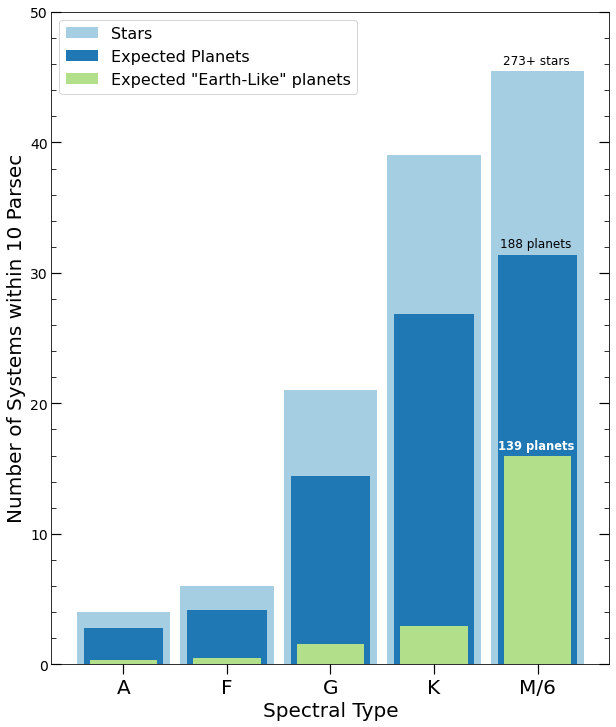

In [124]:
# plot stars and expected planets

expect_planets = startype * 0.689 # Fressin et al 2013
expect_hz_planets = expect_planets * [0.11, 0.11, 0.11, 0.11, 0.51] # numbers GK stars from Petigura above; M from Kopparapu

# color_set = ['tab:blue', 'navy', 'cadetblue']
# color_set = ['#7fcdbb', '#edf8b1', '#2c7fb8']
#color_set = ['#ef8a62', '#edf8b1', '#999999']
color_set = ['#a6cee3', '#1f78b4', '#b2df8a']


fig, ax = plt.subplots(figsize = (10,12))

plt.bar(xx[:-1],startype[:-1] , width = 0.9, color = color_set[0])
plt.bar(xx[-1],startype[-1]/6, color = color_set[0] , label = 'Stars', width = 0.9)
plt.annotate('273+ stars',(xx[-1]-0.33, 46), fontsize = 12)

plt.bar(xx[:-1],expect_planets[:-1] , width = 0.9*0.85, color = color_set[1])
plt.bar(xx[-1],expect_planets[-1]/6, color = color_set[1] , label = 'Expected Planets', width = 0.9*0.85)
plt.annotate('188 planets',(xx[-1]-0.36, 32), fontsize = 12)

plt.bar(xx[:-1],expect_hz_planets[:-1] , width = 0.9*0.85*0.85, color = color_set[2])
plt.bar(xx[-1],expect_hz_planets[-1]/6, color = color_set[2], label = 'Expected "Earth-Like" planets', width = 0.9*0.85*0.85)
plt.annotate('139 planets',(xx[-1]-0.38, 16.5), fontsize = 11.5, color = 'white', weight = 'bold')

plt.ylim([0,50])
plt.xticks(ticks = xx, labels = xnames, fontsize = 20)
plt.yticks(fontsize = 14)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='both', bottom=True, top = True)
ax.tick_params(axis='y', which = 'major', length = 10, width = 1.2, direction = 'in')
ax.tick_params(axis='y', which = 'minor', length = 5, width = 0.8, direction = 'in')
ax.tick_params(axis='x', which = 'major', length = 10, width = 1.2, direction = 'out')
ax.tick_params(axis='x', which = 'minor', length = 0, width = 0, direction = 'in')
plt.legend(loc = 'upper left', fontsize = 16)
plt.xlabel('Spectral Type', fontsize = 20)
plt.ylabel('Number of Systems within 10 Parsec', fontsize = 20)

plt.savefig('Histogram_10pc_planets.pdf')
